100 2


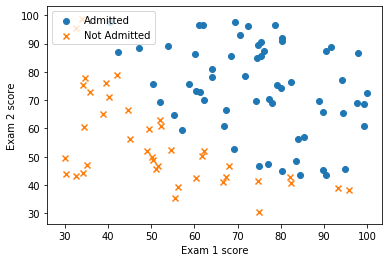

(100, 3)
(3, 1)
(100, 1)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(open("ex2data1.txt"),delimiter = ",");
X = np.array(data[:,0:2])
y = np.array(data[:,2])
(m,n) = X.shape
print(m,n)
theta = np.zeros((n+1,1))

y.shape = (len(data),1)

x1 = np.array([])
out1 = np.array([])
x0 = np.array([])
out0 = np.array([])

A = np.ones((len(X),1))
X = np.c_[A,X]

for x in data:
    if(x[2]==1):
        x1 = np.append(x1,x[0])
        out1 = np.append(out1,x[1])
    else:
        x0 = np.append(x0,x[0])
        out0 = np.append(out0,x[1])

plt.scatter(x1,out1,marker = 'o',label = 'Admitted')
plt.scatter(x0,out0,marker = 'x',label = 'Not Admitted')
plt.legend(loc = 'upper left')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

print(X.shape)
print(theta.shape)
print(y.shape)





Test Cost :  0.2183301938265977
Initial Cost :  0.6931471805599453
final parameters are :  [[-0.76754116]
 [ 0.35868899]
 [-0.11012487]]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


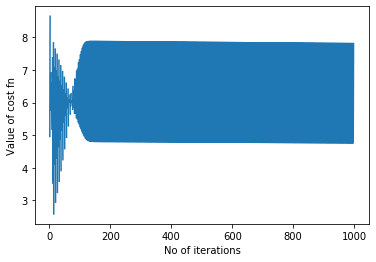

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def computeCost(X,y,theta):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    cost1 = -np.dot(y.T,np.log(h))
    cost2 = -np.dot((1-y).T,np.log(1-h))
    cost = cost1 + cost2
    cost = cost.sum()/m
    return cost

def GradientDescent(X,y,theta,alpha,iterations):
    J_history = np.array([])
    m = X.shape[0]
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X,theta))
        gradient = np.dot(X.T,predictions - y)
        gradient = (1/m)*gradient;
        theta = theta - alpha*gradient;
        newCost = computeCost(X,y,theta)
        J_history = np.append(J_history,newCost)
    return theta,J_history    

"""def GradientDescent(X,y,theta,alpha,iterations):
    J_history = np.array([])
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(np.matmul(X, theta))
        grad = np.matmul(X.T, (h - y)) / m;
        theta = theta - (alpha) * grad
        newCost = computeCost(X,y,theta) 
        J_history = np.append(J_history,newCost)
    return theta,J_history
    """
"""
def GradientDescent(X,y,theta,alpha,num_iters):
    J_history = np.array([])
    m = len(y)
    for a in range(num_iters):
        pred = sigmoid(np.dot(X,theta))
        delta = (1/m)*np.dot(X.T,(pred-y))
        theta = theta - alpha*delta
        #newCost = computeCost(X,y,theta)
        #_history = np.append(J_history,newCost)
    #print("Final values of theta : ",theta)    
    #print(delta.shape)    
    return theta#,J_history
    """



test_theta = np.array([-24, 0.2, 0.2])
testCost = computeCost(X,y,test_theta) 
print("Test Cost : ",testCost) #cost value OK!  


cost = computeCost(X,y,theta)
print("Initial Cost : ",cost)
num_iters = 1000
alpha = 0.01
theta,J_history = GradientDescent(X,y,theta,alpha,num_iters)
    
    
    
print("final parameters are : ",theta)
iterations = [x for x in range(1,num_iters+1)]

#print("theta after G.D.",theta)
#newCost = computeCost(X,theta,y)
#print("Final cost",newCost)
#print(J_history)
J_history.shape = (num_iters,1)
plt.plot(iterations,J_history)
plt.xlabel("No of iterations")
plt.ylabel("Value of cost fn")
plt.show()

